In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [85]:
DATASET_PATH = "D:/flight dataset/"

In [3]:
df = pd.read_csv(DATASET_PATH + "Combined_Flights_2018.csv")
intr_cols = [
    "FlightDate",
    "Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "DepTime",
    "DepDelayMinutes",
    "ArrTime",
    "ArrDelayMinutes",
    "AirTime",
    "ActualElapsedTime",
    "Distance",
    "Year",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "Operating_Airline",
    "DOT_ID_Operating_Airline",
    "Tail_Number",
    "Flight_Number_Operating_Airline",
    "OriginCityName",
    "OriginStateName",
    "OriginWac",
    "DestCityName",
    "DestStateName",
    "DestWac",
    "TaxiOut",
    "WheelsOff",
    "WheelsOn",
    "TaxiIn",
    "DivAirportLandings"
]

df = df[intr_cols]



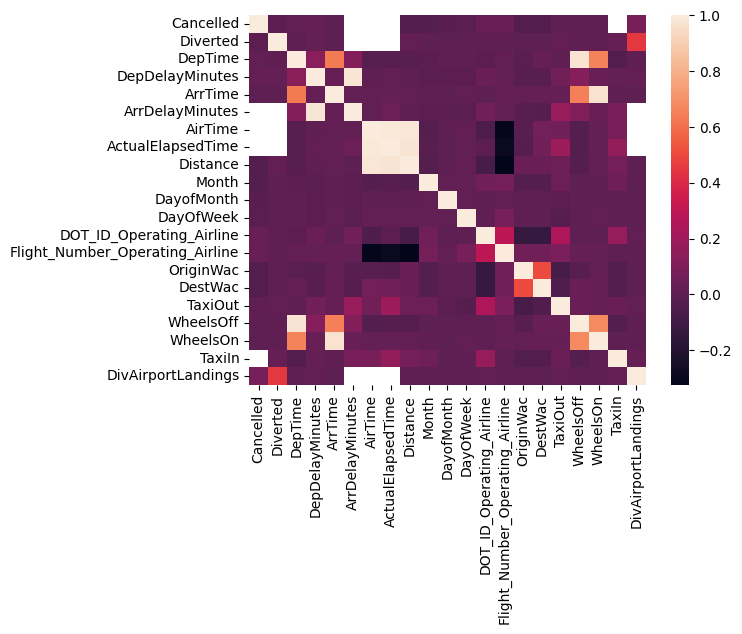

In [4]:
# CORR PLOT
corrDf = df.drop("Year", inplace=False, axis=1)
sns.heatmap(corrDf.corr(), annot=False)
plt.show()

In [ ]:
# Load all dataframes
files = ["Combined_Flights_2018.csv", "Combined_Flights_2019.csv", "Combined_Flights_2021.csv", "Combined_Flights_2022.csv"]
df = pd.DataFrame()
for dataFile in files:
    dfTemp = pd.read_csv(DATASET_PATH + dataFile)
    dfTemp = dfTemp[["DepDelayMinutes", "DayOfWeek", "OriginStateName"]]
    df = pd.concat(df, dfTemp, ignore_index=True)
    del dfTemp


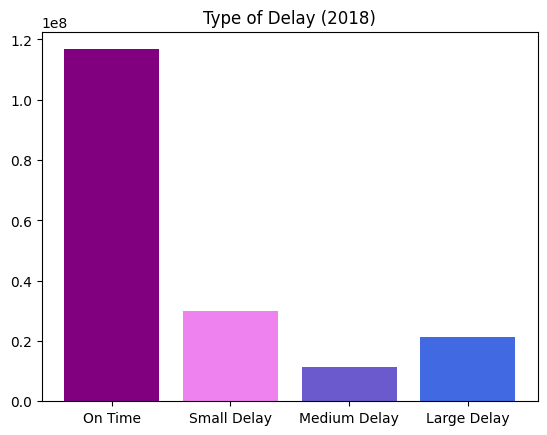

In [28]:
# BAR PLOT DELAY
onTimeDf = df.query("DepDelayMinutes == 0").size
smallDelay = df.query("DepDelayMinutes > 0 & DepDelayMinutes <= 15").size
mediumDelay = df.query("DepDelayMinutes > 15  & DepDelayMinutes <= 30").size
largeDelay = df.query("DepDelayMinutes > 30").size

plt.bar(["On Time", "Small Delay", "Medium Delay", "Large Delay"], [onTimeDf, smallDelay, mediumDelay, largeDelay], color = ["purple", "violet", "slateblue", "royalblue"])
plt.title("Type of Delay (2018)");

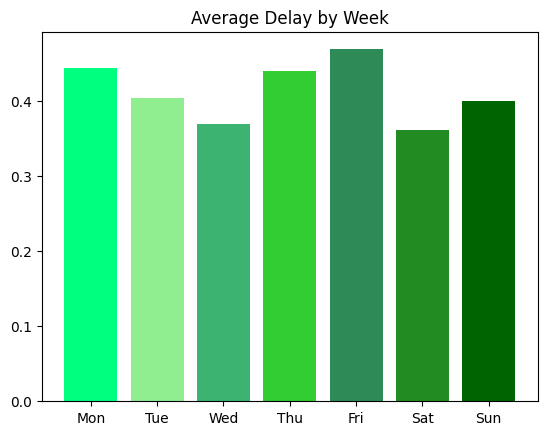

In [48]:
# BAR PLOT: Average Delay by Week
daily = []
weekRange = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for x in range(1, len(weekRange) + 1):
    dailyDf = df.query(f"DayOfWeek == {x}")
    daily.append(dailyDf["DepDelayMinutes"].sum() / dailyDf.size)

plt.bar(weekRange, daily, color = ["springgreen", "lightgreen", "mediumseagreen", "limegreen", "seagreen",  "forestgreen",  "darkgreen"])
plt.title("Average Delay by Week");

<AxesSubplot:ylabel='OriginStateName'>

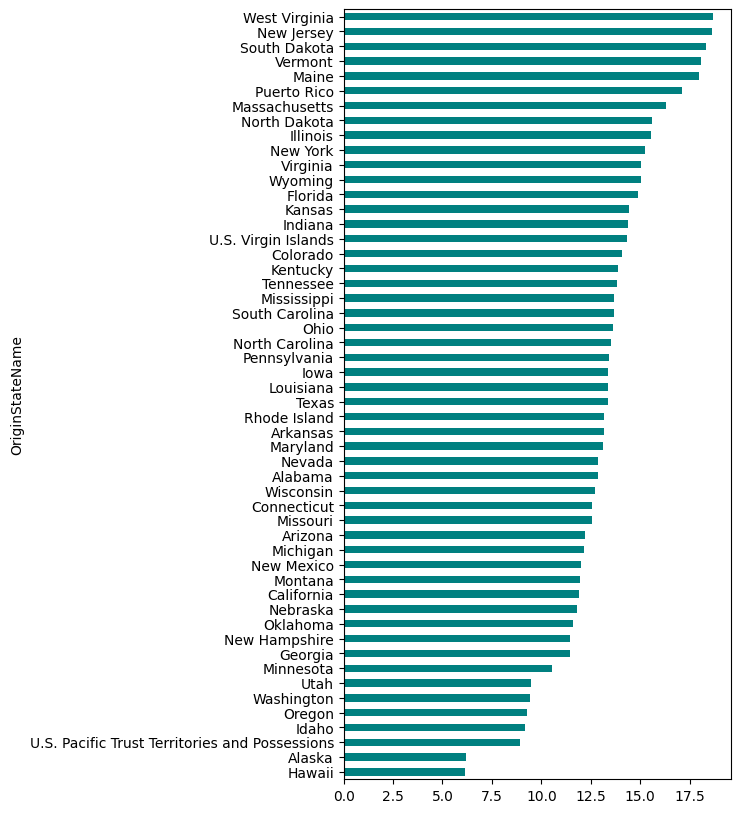

In [84]:
groupDf = df[["DepDelayMinutes", "OriginStateName"]].groupby(["OriginStateName"])
joined = groupDf.sum().merge(groupDf.size().rename("size"), left_index=True, right_index=True)
avgDelState = joined["DepDelayMinutes"] / joined["size"]
avgDelState = avgDelState.sort_values(ascending=True)
plt.figure(figsize=(5,10))
avgDelState.plot.barh(color="teal")
